In [5]:
import theano.tensor as T
import numpy as np
from theano import function

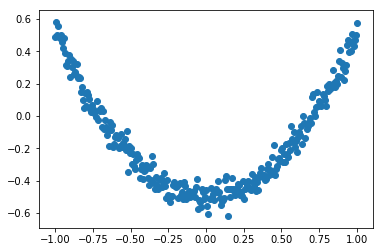

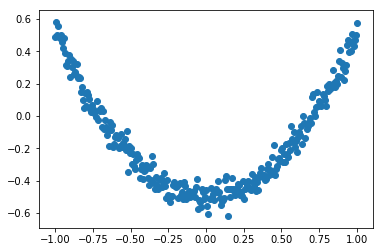

KeyboardInterrupt: 

In [29]:
"""
Please note, this code is only for python 3+. If you are using python 2+, please modify the code accordingly.
"""
from __future__ import print_function
import theano
import theano.tensor as T
import numpy as np
import matplotlib.pyplot as plt


class Layer(object):
    def __init__(self, inputs, in_size, out_size, activation_function=None):
        self.W = theano.shared(np.random.normal(0, 1, (in_size, out_size)))
        self.b = theano.shared(np.zeros((out_size, )) + 0.1)
        self.Wx_plus_b = T.dot(inputs, self.W) + self.b
        self.activation_function = activation_function
        if activation_function is None:
            self.outputs = self.Wx_plus_b
        else:
            self.outputs = self.activation_function(self.Wx_plus_b)


# Make up some fake data
x_data = np.linspace(-1, 1, 300)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise        # y = x^2 - 0.5

# show the fake data
plt.scatter(x_data, y_data)
plt.show()

# determine the inputs dtype
x = T.dmatrix("x")
y = T.dmatrix("y")

# add layers
l1 = Layer(x, 1, 10, T.nnet.relu)
l2 = Layer(l1.outputs, 10, 1, None)

# compute the cost
cost = T.mean(T.square(l2.outputs - y))

# compute the gradients
gW1, gb1, gW2, gb2 = T.grad(cost, [l1.W, l1.b, l2.W, l2.b])

# apply gradient descent
learning_rate = 0.1
train = theano.function(
    inputs=[x, y],
    outputs=[cost],
    updates=[(l1.W, l1.W - learning_rate * gW1),
             (l1.b, l1.b - learning_rate * gb1),
             (l2.W, l2.W - learning_rate * gW2),
             (l2.b, l2.b - learning_rate * gb2)])

# prediction
predict = theano.function(inputs=[x], outputs=l2.outputs)

# plot the real data
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
plt.ion()
plt.show()

for i in range(1000):
    # training
    err = train(x_data, y_data)
    if i % 50 == 0:
        # to visualize the result and improvement
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        prediction_value = predict(x_data)
        # plot the prediction
        lines = ax.plot(x_data, prediction_value, 'r-', lw=5)
        plt.pause(.5)

## basic

In [6]:
x = T.dscalar('x')#定义存量
y = T.dscalar('y')
z = x+y
f = function([x,y],z)

In [8]:
print(f(2,3))

5.0


In [10]:
# to pretty-print the function
from theano import pp
print(pp(z))

(x + y)


In [12]:
# 定义matrix
x = T.dmatrix('x')
y = T.dmatrix('y')
z = x+y
f = function([x,y],z)
print(pp(z))

(x + y)


In [14]:
print(f(np.arange(12).reshape((3,4)),
        10*np.ones((3,4))))

[[ 10.  11.  12.  13.]
 [ 14.  15.  16.  17.]
 [ 18.  19.  20.  21.]]


In [15]:
import theano

### activation function example
### multiply outputs for a function
### name for a function

In [16]:
#activation function example
x = T.dmatrix('x')
s = 1/(1+T.exp(-x)) #sigmoid function
logistic = theano.function([x],s)

In [17]:
print(logistic([[0,1],
                [2,3]])) #2x3

[[ 0.5         0.73105858]
 [ 0.88079708  0.95257413]]


In [18]:
#multiply outputs for a function
a,b = T.dmatrices('a','b')
diff = a-b
abs_diff = abs(diff)
diff_squared = diff**2
f = theano.function([a,b],[diff,abs_diff,diff_squared])

In [19]:
print(f(np.ones((2,2)),
        np.arange(4).reshape((2,2))))

[array([[ 1.,  0.],
       [-1., -2.]]), array([[ 1.,  0.],
       [ 1.,  2.]]), array([[ 1.,  0.],
       [ 1.,  4.]])]


In [21]:
x1,x2,x3 = f(np.ones((2,2)),
        np.arange(4).reshape((2,2)))

In [22]:
print(x1)

[[ 1.  0.]
 [-1. -2.]]


In [25]:
# name for a function
x,y,w = T.dscalars('x','y','w')
z = (x+y)*w
f = theano.function([x,
                     theano.In(y,value=1),
                     theano.In(w,value=2,name='weights')],z)

In [26]:
print(f(23,))

48.0


In [28]:
print(f(23,2,weights = 4))

100.0


### shared 变量

In [48]:
#to get variable value
state = theano.shared(np.array(0,dtype=np.float64),'state')
inc = T.scalar('inc',dtype=state.dtype)
accumuator = theano.function([inc],state,updates = [(state,state+inc)])#累加
# print(accumuator(10))
# print(accumuator(10))

In [49]:
print(state.get_value())
accumuator(1)
print(state.get_value())
accumuator(10)
print(state.get_value())

0.0
1.0
11.0


In [51]:
# to set variable value
state.set_value(-1)
accumuator(3)
print(state.get_value())

2.0


In [54]:
#temporarily replace shared variable with another value in another function
tmp_func = inc + state*2
a = T.scalar(dtype=state.dtype)
skip_shared = theano.function([inc,a],tmp_func,givens=[(state,a)])

In [57]:
print(skip_shared(2,3))
print(state.get_value())

8.0
2.0


## 定义Layer类

In [65]:
'''
to define the layer like this:
l1 =  Layer(inputs,in_size = 1,out_size = 10,activation_function)
l2 =  Layer(l1.outputs,10,2,None)
'''
class Layer(object):
    def __init__(self,inputs,in_size,out_size,activation_function = None):
        self.W = theano.shared(np.random.normal(0,1,(in_size,out_size)))
        self.b = theano.shared(np.zeros((out_size,)) + 0.1 )
        self.Wx_plus_b = T.dot(inputs,self.W)+self.b
        self.activation_function = activation_function
        if activation_function is None:
            self.outputs = self.Wx_plus_b
        else:
            self.outputs = self.activation_function(self.Wx_plus_b)

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
# Make up some fake data
x_data = np.linspace(-1,1,300)[:,np.newaxis]
noise = np.random.normal(0,0.005,x_data.shape)
y_data = np.square(x_data)-0.5+noise           #y = x^2-0.5
print(np.shape(x_data))

(300, 1)


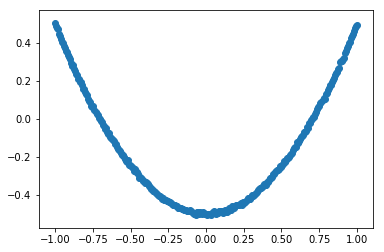

In [61]:
#show the fake data
plt.scatter(x_data,y_data)
plt.show()

In [64]:
#determine the inputs dtype
x = T.dmatrix('x')
y = T.dmatrix('y')

In [68]:
# add layers
l1 = Layer(x,1,10,T.nnet.relu)
l2 = Layer(l1.outputs,10,1,None)
#compute the cost
cost = T.mean(T.square(l2.outputs-y))


In [69]:
# compute the gradients
gW1,gb1,gW2,gb2 = T.grad(cost,[l1.W,l1.b,l2.W,l2.b])

In [70]:
#apply gradient descent
learning_rate = 0.05
train = theano.function(inputs=[x,y],
                        outputs=cost,
                       updates = [(l1.W,l1.W-learning_rate*gW1),
                                  (l1.b,l1.b-learning_rate*gb1),
                                 (l2.W,l2.W-learning_rate*gW2),
                                 (l2.b,l2.b-learning_rate*gb2)])

In [71]:
#prediction
predict = theano.function(inputs=[x],
                         outputs = l2.outputs)

In [72]:
# 放数据
for i in range(1000):
    #training 
    err = train(x_data,y_data)
    if i%50==0:                 #看每50步误差是否有减小
        print(err)

0.4492959526057394
0.006892301172196569
0.0058558485017447615
0.0054590013796068995
0.005118053821327334
0.0048135786058864805
0.0045411231385717125
0.004295561904249263
0.004064917936906662
0.0038489395725685147
0.0036438188868806536
0.0034461481903617767
0.0032569680008070197
0.003073915623549233
0.0028973724453957065
0.0027259415282393108
0.0025604009168367593
0.0024037858924241327
0.002254777664555096
0.0021149886512447772


### 回归可视化结果

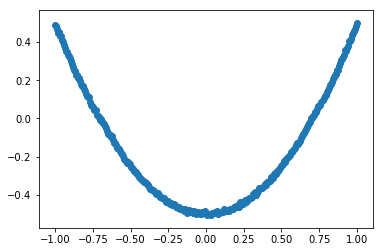

KeyboardInterrupt: 

In [75]:
# plot the fake data
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data,y_data)
plt.ion()#终止plt.show中block的命令
plt.show()
for i in range(1000):
    #training 
    err = train(x_data,y_data)
    if i%50==0: 
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        # to visualize the result and improvement
        prediction_value = predict(x_data)
        # plot the prediction
        lines = ax.plot(x_data,prediction_value,'r-',lw = 5)
        plt.pause(1)#每50步也再暂停一秒钟

## classification 分类学习

In [77]:
#正确率的计算
def compute_accuracy(y_target,y_prefict):
    correct_prediction = np.equal(y_predict,y_target)
    accuracy = np.sum(correct_prediction)/len(correct_prediction)
    return accuracy

In [78]:
rng = np.random
N = 400 #training sample size
feats = 784 #number of input variables

In [102]:
#generate a dataset:D = (input_valyes,target_class)
D = (rng.randn(N,feats),rng.randint(size = N,low = 0,high = 2))

In [106]:
# Declare Theano symbolic variables
x = T.dmatrix('x')
y = T.dvector('y')

In [81]:
#initialize the weights and biases
W = theano.shared(rng.rand(feats),name = 'w')
b = theano.shared(0.1,name = 'b')


In [110]:
# Construct Theano expression graph
p_1 = T.nnet.sigmoid(T.dot(x,W)+b)
prediction = p_1 > 0.5 
xent = -y*T.log(p_1)-(1-y)*T.log(1-p_1)#cost
cost = xent.mean() + 0.01*(W**2).sum() #0.01*(w**2).sum()解决over fitting(正则化)
gW,gb= T.grad(cost,[W,b])

In [100]:
#Compile
learning_rate = 0.1
train = theano.function(inputs= [x,y],outputs = [prediction,xent.mean()],
                       updates = ((W,W-learning_rate*gW),
                                 (b,b-learning_rate*gb)))
predict = theano.function([x],prediction)

In [111]:
# Training
for i in range(500):
    pred, err = train(D[0], D[1])
    if i % 50 == 0:
        print('cost:', err)
        print("accuracy:", compute_accuracy(D[1], predict(D[0])))

print("target values for D:")
print(D[1])
print("prediction on D:")
print(predict(D[0]))

cost: 0.04891389840984435
accuracy: 1.0
cost: 0.04906598633656355
accuracy: 1.0
cost: 0.04918291231603506
accuracy: 1.0
cost: 0.04927149773620372
accuracy: 1.0
cost: 0.049337578353333245
accuracy: 1.0
cost: 0.04938604337804295
accuracy: 1.0
cost: 0.04942091937081596
accuracy: 1.0
cost: 0.04944546645943383
accuracy: 1.0
cost: 0.04946227863448046
accuracy: 1.0
cost: 0.0494733847765478
accuracy: 1.0
target values for D:
[1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1
 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0
 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0
 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1
 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1
 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0

## 正则化
### 神经网络正则化：dropout regularization

In [121]:
from sklearn.datasets import load_boston
def minmax_normalization(data):
    xs_max = np.max(data,axis = 0)
    xs_min = np.min(data,axis = 0)
    xs = (1-0)*(data-xs_min)/(xs_max-xs_min)+0
    return xs

In [131]:
np.random.seed(100)
x_data = load_boston().data
# minmax normalization, rescale the inputs
x_data = minmax_normalization(x_data)
y_data = load_boston().target[:, np.newaxis]

In [130]:
#cross validation.train test data split
x_train, y_train = x_data[:400], y_data[:400]
x_test, y_test = x_data[400:], y_data[400:]

In [124]:
x = T.dmatrix('x')
y = T.dmatrix('y')

In [125]:
l1 = Layer(x,13,50,T.tanh)
l2 = Layer(l1.outputs,50,1,None)

In [127]:
# the way to compute cost
#cost = T.mean(T.square(l2.outputs-y))+0.1*((l1.W**2).sum()+(l2.W**2).sum())#l2 regularization
cost = T.mean(T.square(l2.outputs-y))+0.1*(abs(l1.W).sum()+abs(l2.W).sum())#l1 regularization

In [139]:
gW1,gb1,gW2,gb2 = T.grad(cost,[l1.W,l1.b,l2.W,l2.b])

In [140]:
#apply gradient descent
learning_rate = 0.01
train = theano.function(inputs=[x,y],
                        outputs=cost,
                       updates = [(l1.W,l1.W-learning_rate*gW1),
                                  (l1.b,l1.b-learning_rate*gb1),
                                 (l2.W,l2.W-learning_rate*gW2),
                                 (l2.b,l2.b-learning_rate*gb2)])

In [141]:
compute_cost = theano.function(inputs = [x,y],
                              outputs = cost)

In [ ]:
train_err_list =[]
test_err_list =[]
learning_time = []
for i in range(1000):
    train(x_train,y_train)
    if i % 50 == 0:
        train_err_list.append(compute_cost(x_train,y_train))
        test_err_list.append(compute_cost(x_test,y_test))
        learning_time.append(i)

plt.plot(learning_time,train_err_list,'r-')
plt.plot(learning_time,test_err_list,'b--')
plt.show()